In [ ]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append(r"C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis")


from fish import LegacyFish as Fish
from utilties.pathutils import pathcrawler
from utilties.constants import invStimDict, monocular_dict, baseBinocs
import volumes

# find the paths

In [2]:
fishpaths = {
    3: pathcrawler(r"D:\Data\Imaging\2022\Nov82022_3dpf", set(), [], "fish"),
    4: pathcrawler(r"D:\Data\Imaging\2022\Nov92022_4dpf", set(), [], "fish"),
    5: pathcrawler(r"D:\Data\Imaging\2022\Nov102022_5dpf", set(), [], "fish"),
}

# make class objects per path

In [3]:
fish = {i: [] for i in fishpaths.keys()}
for k in fishpaths.keys():
    for p in fishpaths[k]:
        f = Fish(p, stimkey="output")
        f.stimulus_df_condensed.loc[
            :, "stim_nameINV"
        ] = f.stimulus_df_condensed.stim_name.map(invStimDict)
        fish[k].append(f)

C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


# process a few example fish

In [4]:
allthresholds = 0.75
zerobool = True  # this will inflate correlations -- unsure if to my benefit or not will filter Off-responses&thelike

inds = {3: 0, 4: 0, 5: 0}
used_fish = {k: fish[k][v] for k, v in inds.items()}

for f in used_fish.values():
    f.zdiff_stimdicts()
    f.zdiff_booldf(threshold=allthresholds, zero_arr=zerobool)

C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:04<00:03,  1.53s/it]C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Soft_Kitty\Anaconda3\envs\caiman\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.80s/it]


# plot top N (20) right neurons @ 3dpf

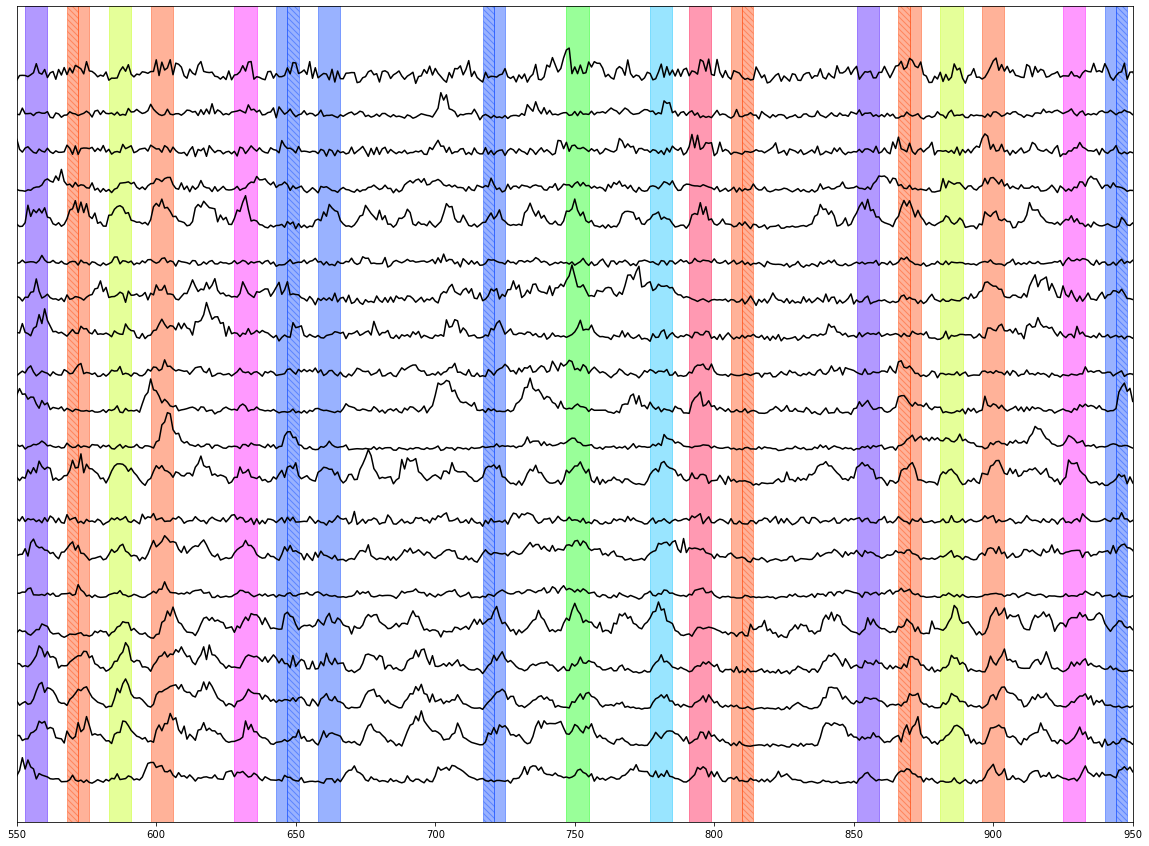

In [5]:
nemo = used_fish[3]
stimChoice = "right"

stim_offset = 5

nrns = volumes.grabPeakNeurons(nemo, stimChoice, 20)

plt.figure(figsize=(20, 15))

for z in range(20):
    plt.plot(np.arange(len(nrns[z])), nrns[z] + z, color="black")

monoc_stims = nemo.stimulus_df_condensed[
    (nemo.stimulus_df_condensed.stim_nameINV.isin(monocular_dict.keys()))
    | (nemo.stimulus_df_condensed.stim_nameINV.isin(baseBinocs))
]
frames = monoc_stims["0_frame"].values
stimmies = monoc_stims["stim_nameINV"].values

for s, stimmy in zip(frames, stimmies):
    if stimmy in monocular_dict.keys():
        plt.axvspan(s - 1, s + stim_offset + 2, color=monocular_dict[stimmy], alpha=0.4)

    if stimmy in baseBinocs:
        begin = s - 1
        end = s + stim_offset + 2
        midpt = begin + (end - begin) // 2

        if stimmy == "lateral_left":
            plt.axvspan(
                begin, midpt, color=monocular_dict["left"], alpha=0.4, hatch=r"\\\\"
            )
            plt.axvspan(midpt, end, color=monocular_dict["left"], alpha=0.4)
        if stimmy == "medial_left":
            plt.axvspan(begin, midpt, color=monocular_dict["left"], alpha=0.4)
            plt.axvspan(
                midpt, end, color=monocular_dict["left"], alpha=0.4, hatch=r"\\\\"
            )

        if stimmy == "lateral_right":
            plt.axvspan(begin, midpt, color=monocular_dict["right"], alpha=0.4)
            plt.axvspan(
                midpt, end, color=monocular_dict["right"], alpha=0.4, hatch=r"\\\\"
            )
        if stimmy == "medial_right":
            plt.axvspan(
                begin, midpt, color=monocular_dict["right"], alpha=0.4, hatch=r"\\\\"
            )
            plt.axvspan(midpt, end, color=monocular_dict["right"], alpha=0.4)


plt.xlim(550, 950)
plt.yticks([])
plt.show()

# plot top N (20) right neurons @ 5dpf

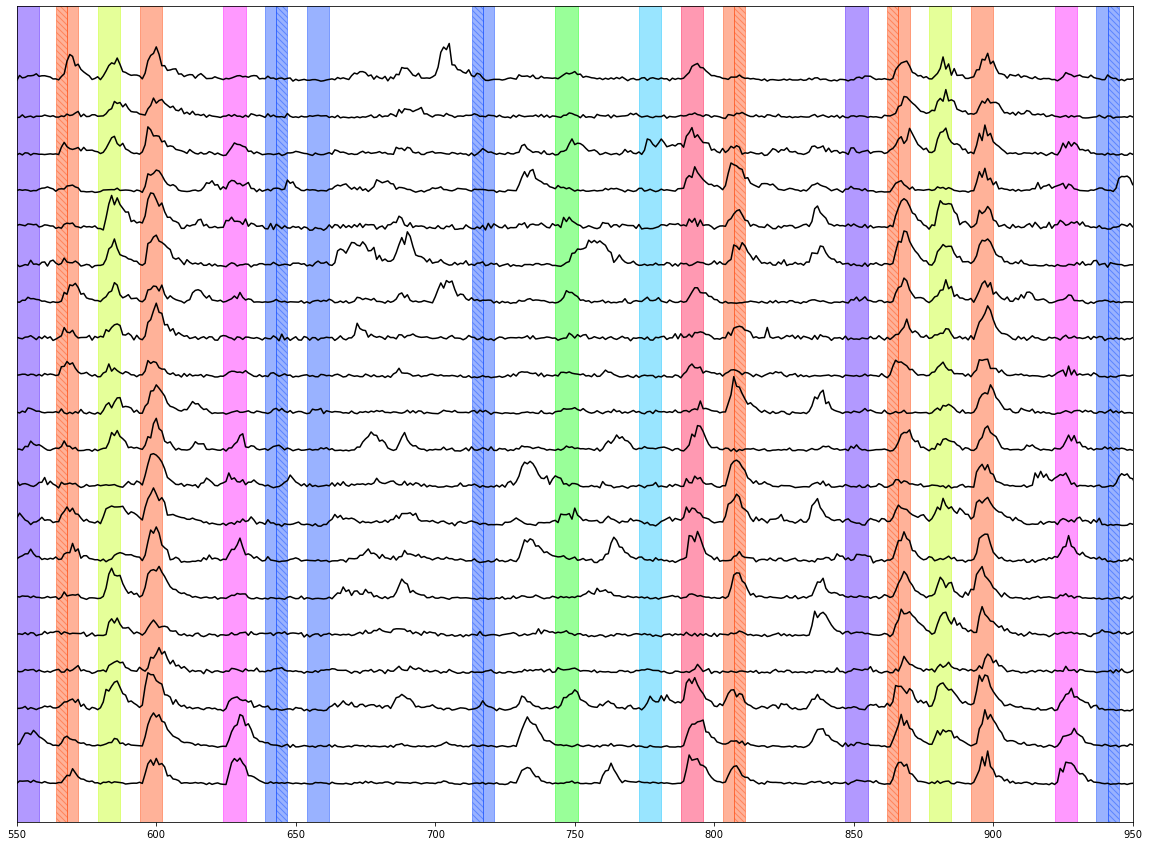

In [6]:
nemo = used_fish[5]
stimChoice = "right"

stim_offset = 5

nrns = volumes.grabPeakNeurons(nemo, stimChoice, 20)

plt.figure(figsize=(20, 15))

for z in range(20):
    plt.plot(np.arange(len(nrns[z])), nrns[z] + z, color="black")

monoc_stims = nemo.stimulus_df_condensed[
    (nemo.stimulus_df_condensed.stim_nameINV.isin(monocular_dict.keys()))
    | (nemo.stimulus_df_condensed.stim_nameINV.isin(baseBinocs))
]
frames = monoc_stims["0_frame"].values
stimmies = monoc_stims["stim_nameINV"].values

for s, stimmy in zip(frames, stimmies):
    if stimmy in monocular_dict.keys():
        plt.axvspan(s - 1, s + stim_offset + 2, color=monocular_dict[stimmy], alpha=0.4)

    if stimmy in baseBinocs:
        begin = s - 1
        end = s + stim_offset + 2
        midpt = begin + (end - begin) // 2

        if stimmy == "lateral_left":
            plt.axvspan(
                begin, midpt, color=monocular_dict["left"], alpha=0.4, hatch=r"\\\\"
            )
            plt.axvspan(midpt, end, color=monocular_dict["left"], alpha=0.4)
        if stimmy == "medial_left":
            plt.axvspan(begin, midpt, color=monocular_dict["left"], alpha=0.4)
            plt.axvspan(
                midpt, end, color=monocular_dict["left"], alpha=0.4, hatch=r"\\\\"
            )

        if stimmy == "lateral_right":
            plt.axvspan(begin, midpt, color=monocular_dict["right"], alpha=0.4)
            plt.axvspan(
                midpt, end, color=monocular_dict["right"], alpha=0.4, hatch=r"\\\\"
            )
        if stimmy == "medial_right":
            plt.axvspan(
                begin, midpt, color=monocular_dict["right"], alpha=0.4, hatch=r"\\\\"
            )
            plt.axvspan(midpt, end, color=monocular_dict["right"], alpha=0.4)


plt.xlim(550, 950)
plt.yticks([])
plt.show()